# Quora question pairs: training

## Import packages

In [3]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import pandas as pd
import datetime, time, json
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, Reshape, Merge, BatchNormalization, TimeDistributed, Lambda
from keras.regularizers import l2
from keras.callbacks import Callback, ModelCheckpoint
from keras import backend as K
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Initialize global variables

In [8]:
Q1_TRAINING_DATA_FILE = 'q1_train.npy'
Q2_TRAINING_DATA_FILE = 'q2_train.npy'
LABEL_TRAINING_DATA_FILE = 'label_train.npy'
WORD_EMBEDDING_MATRIX_FILE = 'word_embedding_matrix.npy'
NB_WORDS_DATA_FILE = 'nb_words.json'
MODEL_WEIGHTS_FILE = 'question_pairs_weights.h5'
MAX_SEQUENCE_LENGTH = 25

# Fix embedding dimaintion
# EMBEDDING_DIM = 300
EMBEDDING_DIM = 50

VALIDATION_SPLIT = 0.1
TEST_SPLIT = 0.1
RNG_SEED = 13371447
NB_EPOCHS = 25

## Load the dataset, embedding matrix and word count

In [9]:
q1_data = np.load(open(Q1_TRAINING_DATA_FILE, 'rb'))
q2_data = np.load(open(Q2_TRAINING_DATA_FILE, 'rb'))
labels = np.load(open(LABEL_TRAINING_DATA_FILE, 'rb'))
word_embedding_matrix = np.load(open(WORD_EMBEDDING_MATRIX_FILE, 'rb'))
with open(NB_WORDS_DATA_FILE, 'r') as f:
    nb_words = json.load(f)['nb_words']

## Partition the dataset into train and test sets

In [10]:
X = np.stack((q1_data, q2_data), axis=1)
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RNG_SEED)
Q1_train = X_train[:,0]
Q2_train = X_train[:,1]
Q1_test = X_test[:,0]
Q2_test = X_test[:,1]

## Define the model

In [15]:
Q1 = Sequential()
Q1.add(Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=MAX_SEQUENCE_LENGTH, 
                 trainable=False))
Q1.add(TimeDistributed(Dense(EMBEDDING_DIM, activation='relu')))
Q1.add(Lambda(lambda x: K.max(x, axis=1), output_shape=(EMBEDDING_DIM, )))
Q2 = Sequential()
Q2.add(Embedding(nb_words + 1, 
                 EMBEDDING_DIM, 
                 weights=[word_embedding_matrix], 
                 input_length=MAX_SEQUENCE_LENGTH, 
                 trainable=False))
Q2.add(TimeDistributed(Dense(EMBEDDING_DIM, activation='relu')))
Q2.add(Lambda(lambda x: K.max(x, axis=1), output_shape=(EMBEDDING_DIM, )))
model = Sequential()
model.add(Merge([Q1, Q2], mode='concat'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(200, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

'''
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', 'precision', 'recall', 'fbeta_score'])
'''

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

/home/bassed1984/Project/keras-quora-question-pairs/VENV/lib/python3.5/site-packages/ipykernel_launcher.py:18: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


## Train the model, checkpointing weights with best validation accuracy

In [16]:
print("Starting training at", datetime.datetime.now())
t0 = time.time()
callbacks = [ModelCheckpoint(MODEL_WEIGHTS_FILE, monitor='val_acc', save_best_only=True)]
history = model.fit([Q1_train, Q2_train],
                    y_train,
                    nb_epoch=NB_EPOCHS,
                    validation_split=VALIDATION_SPLIT,
                    verbose=2,
                    callbacks=callbacks)
t1 = time.time()
print("Training ended at", datetime.datetime.now())
print("Minutes elapsed: %f" % ((t1 - t0) / 60.))

Starting training at 2017-05-04 01:59:43.704362


/home/bassed1984/Project/keras-quora-question-pairs/VENV/lib/python3.5/site-packages/keras/models.py:834: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 327474 samples, validate on 36387 samples
Epoch 1/25
238s - loss: 0.5468 - acc: 0.7155 - val_loss: 0.4969 - val_acc: 0.7433
Epoch 2/25
226s - loss: 0.4933 - acc: 0.7512 - val_loss: 0.4693 - val_acc: 0.7608
Epoch 3/25
228s - loss: 0.4719 - acc: 0.7648 - val_loss: 0.4550 - val_acc: 0.7744
Epoch 4/25
239s - loss: 0.4586 - acc: 0.7733 - val_loss: 0.4442 - val_acc: 0.7799
Epoch 5/25
221s - loss: 0.4488 - acc: 0.7795 - val_loss: 0.4390 - val_acc: 0.7838
Epoch 6/25
228s - loss: 0.4415 - acc: 0.7842 - val_loss: 0.4397 - val_acc: 0.7795
Epoch 7/25
223s - loss: 0.4347 - acc: 0.7883 - val_loss: 0.4331 - val_acc: 0.7870
Epoch 8/25
223s - loss: 0.4283 - acc: 0.7913 - val_loss: 0.4305 - val_acc: 0.7892
Epoch 9/25
222s - loss: 0.4227 - acc: 0.7951 - val_loss: 0.4286 - val_acc: 0.7895
Epoch 10/25
234s - loss: 0.4191 - acc: 0.7967 - val_loss: 0.4271 - val_acc: 0.7902
Epoch 11/25
232s - loss: 0.4147 - acc: 0.8011 - val_loss: 0.4253 - val_acc: 0.7931
Epoch 12/25
230s - loss: 0.4104 - acc: 0.8033

## Plot training and validation accuracy

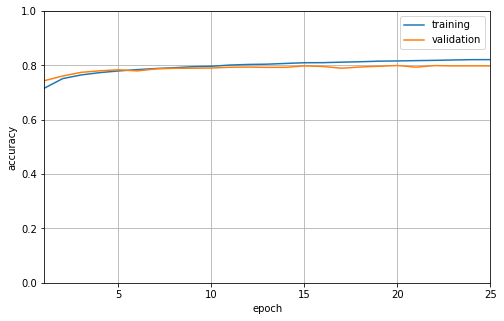

In [17]:
acc = pd.DataFrame({'epoch': [ i + 1 for i in history.epoch ],
                    'training': history.history['acc'],
                    'validation': history.history['val_acc']})
ax = acc.ix[:,:].plot(x='epoch', figsize={5,8}, grid=True)
ax.set_ylabel("accuracy")
ax.set_ylim([0.0,1.0]);

## Print best validation accuracy and epoch

In [18]:
max_val_acc, idx = max((val, idx) for (idx, val) in enumerate(history.history['val_acc']))
print('Maximum accuracy at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(max_val_acc))

Maximum accuracy at epoch 20 = 0.7994


## Evaluate the model with best validation accuracy on the test partition

In [22]:
model.load_weights(MODEL_WEIGHTS_FILE)
# loss, accuracy, precision, recall, fbeta_score = model.evaluate([Q1_test, Q2_test], y_test)
loss, accuracy = model.evaluate([Q1_test, Q2_test], y_test)

print('')
print('loss      = {0:.4f}'.format(loss))
print('accuracy  = {0:.4f}'.format(accuracy))
# print('precision = {0:.4f}'.format(precision))
# print('recall    = {0:.4f}'.format(recall))
# print('F         = {0:.4f}'.format(fbeta_score))

40384/40429 [============================>.] - ETA: 0s 

## Save model

In [23]:
"""
https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model
"""

from keras.models import load_model

model.save('model_6b_50d.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one

# model = load_model('model_6b_50d.h5')


model.save_weights('model_weights_6b_50d.h5')
# model.load_weights('model_weights_6b_50d.h5')